# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:


# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
u_set = set(y_train)
n_classes = len(u_set)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

17


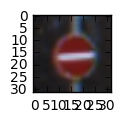

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])



In [71]:
sgn_names = []
import csv
with open('signnames.csv') as _f:
    rows = csv.reader(_f, delimiter=',')
    next(rows, None)  # skip the headers
    for row in rows:
        sgn_names.append(row[1])
        #print(row[0],row[1])
        
        

In [73]:
print(sgn_names[10])

No passing for vehicles over 3.5 metric tons


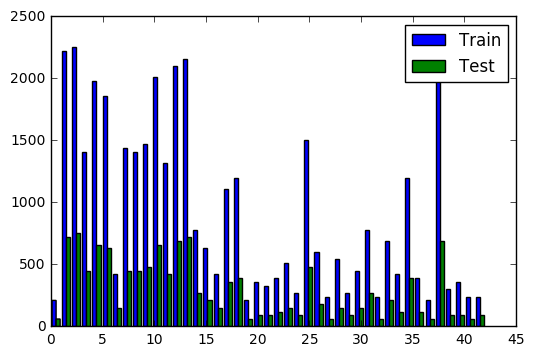

In [5]:
#Lets plot the types of images with their count in Tain set and Test Set
plt.hist( [y_train,y_test], bins = 43,label=['Train', 'Test'])
plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# we will shuffle the data to improve the randomness
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

import tensorflow as tf



In [7]:
#normalize all images
import cv2
X_train_norm = []
cont = 0
for i in range (0,len(X_train)):
    im = X_train[i]
    X_train_norm.append(cv2.normalize(X_train[i],im, 0, 255, cv2.NORM_MINMAX))
    cont +=1

print(cont)

39209


In [89]:
print(cont)
print(len(X_train))
print(len(X_train_norm))

39209
39209
39209


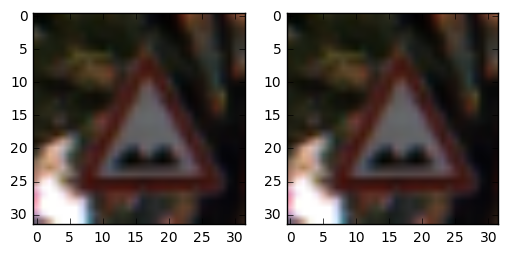

In [8]:
plt.subplot(121)             # the first subplot in the first figure
plt.imshow(X_train[15] )
plt.subplot(122)             # the second subplot in the first figure
plt.imshow(X_train_norm[15] )


In [55]:
print(len(X_train))
print(len(X_train_norm))

31367
31367


In [9]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, x_validation, y_train,y_validation = train_test_split(X_train_norm,y_train,test_size = 0.2, random_state = 0)
#X_train, x_validation, y_train,y_validation = train_test_split(X_train,y_train,test_size = 0.2, random_state = 0)

print("Updated Image Shape {}",format(X_train[0].shape))

Updated Image Shape {} (32, 32, 3)


### Define your architecture here.

** Architecture **
Here is my Architecture


Input 32x32x3 - colour image input 

Layer 1: Convolutional Layer (5x5x3 filter, output 28x28x6)

Relu Activation

Pooling (Input = 28x28x6. Output = 14x14x6.)

Layer 2: Convolutional Layer (5x5x6 filter, output 10x10x16)

Relu Activation

Pooling (Input = 10x10x16. Output = 5x5x16.)

Flatten (Output 400)

Layer 3: Fully Connected Layer. (Input 400 Output 120)

Relu Activation

Layer 4: Fully Connected Layer. (Input 120 Output 84)

Relu Activation

Layer 5: Fully Connected Layer. (Input 84 Output 10)


In [10]:


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 5
BATCH_SIZE = 64

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [12]:
#  Training Pipeline

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
def loss(logits, labels):
    diff = tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels= labels)
    cross_entropy = tf.reduce_mean(diff)
    return cross_entropy

def accuracy(logits, labels):
    y_pred_cls = tf.argmax(labels, 1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), y_pred_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy, y_pred_cls

In [14]:
# Model Evaluation
# Label Tensor
#labels_placeholder = tf.placeholder(tf.float32, shape=(None, 43), name='y')

# Image Tensor
#images_placeholder = tf.placeholder(tf.float32, shape=[None, 32, 32, 3], name='x')


# calculate loss
loss_value = loss(logits, one_hot_y)

# accuracy
acc, y_pred_cls = accuracy(logits, one_hot_y)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    Predictions = list()
    total_accuracy = 0
    total_loss = 0
    loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss,accuracy, predictions = sess.run([loss_value, acc, y_pred_cls], feed_dict={x: batch_x, y: batch_y })
        total_accuracy += (accuracy * len(batch_x))
        Predictions.append(predictions)
        total_loss += (loss * len(batch_x))
    print(total_accuracy,total_loss, num_examples)
    return (total_accuracy / num_examples, total_loss / num_examples, Predictions)


In [15]:
#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        print(y_validation[0])
        print(y_validation[1])
        
        validation_accuracy, val_loss, predictions = evaluate(x_validation, y_validation)
        #validation_accuracy = evaluateOri(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy*100))
        print()
        
    saver.save(sess, './model.chkpt')
    print("Model saved")
    


Training...

5
4
6458.99999928 0.730344176292 7842
EPOCH 1 ...
Validation Accuracy = 82.364

5
4
7081.00000012 0.485397458076 7842
EPOCH 2 ...
Validation Accuracy = 90.296

5
4
7278.99999905 0.350078880787 7842
EPOCH 3 ...
Validation Accuracy = 92.821

5
4
7402.00000012 0.283168464899 7842
EPOCH 4 ...
Validation Accuracy = 94.389

5
4
7417.99999905 0.306485980749 7842
EPOCH 5 ...
Validation Accuracy = 94.593

Model saved


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
 used RGB and it gave 97% validation accuracy

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used Training set as it is
Out of Test data set, I user 80% for validation and 20% for testing

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Here is my Architecture


Input 32x32x3 - colour image input 

Layer 1: Convolutional Layer (5x5x3 filter, output 28x28x6)

Relu Activation

Pooling (Input = 28x28x6. Output = 14x14x6.)

Layer 2: Convolutional Layer (5x5x6 filter, output 10x10x16)

Relu Activation

Pooling (Input = 10x10x16. Output = 5x5x16.)

Flatten (Output 400)

Layer 3: Fully Connected Layer. (Input 400 Output 120)

Relu Activation

Layer 4: Fully Connected Layer. (Input 120 Output 84)

Relu Activation

Layer 5: Fully Connected Layer. (Input 84 Output 10)


In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 5
BATCH_SIZE = 64

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [17]:

#  Training Pipeline

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
def loss(logits, labels):
    diff = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels)
    cross_entropy = tf.reduce_mean(diff)
    return cross_entropy

def accuracy(logits, labels):
    y_pred_cls = tf.argmax(labels, 1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), y_pred_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy, y_pred_cls

In [19]:
# Model Evaluation
# Label Tensor
#labels_placeholder = tf.placeholder(tf.float32, shape=(None, 43), name='y')

# Image Tensor
#images_placeholder = tf.placeholder(tf.float32, shape=[None, 32, 32, 3], name='x')


# calculate loss
loss_value = loss(logits, one_hot_y)

# accuracy
acc, y_pred_cls = accuracy(logits, one_hot_y)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    Predictions = list()
    total_accuracy = 0
    total_loss = 0
    loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss,accuracy, predictions = sess.run([loss_value, acc, y_pred_cls], feed_dict={x: batch_x, y: batch_y })
        total_accuracy += (accuracy * len(batch_x))
        Predictions.append(predictions)
        total_loss += (loss * len(batch_x))
    print(total_accuracy,total_loss, num_examples)
    return (total_accuracy / num_examples, total_loss / num_examples, Predictions)

def evaluateOri(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
import os
import cv2
from PIL import Image
names = os.listdir('./downloads')
print(names)
images = [cv2.imread('./downloads/'+img, 1) for img in names]
classes = [int(img.replace('.JPG', '')) for img in names]

import numpy as np

X_downloaded = images
y_downloaded = list()
for _cls in classes:
    y2 = np.zeros(43, dtype=np.uint8)
    y2[_cls] = 1.
    y_downloaded.append(_cls)
    #y_downloaded.append(y)

y_downloaded = np.array(y_downloaded)

#X_downloaded = x_validation[1:100]
#y_downloaded = y_validation[1:100]
#one_hot_labels = np.zeros((y_downloaded, y_downloaded.shape[0]))
print(y_downloaded)

['0.JPG', '14.JPG', '23.JPG', '33.JPG', '34.JPG', '35.JPG']
[ 0 14 23 33 34 35]


In [21]:
#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        print(y_validation[0])
        print(y_validation[1])
        
        validation_accuracy, val_loss, predictions = evaluate(x_validation, y_validation)
        #validation_accuracy = evaluateOri(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy*100))
        print()
        
    saver.save(sess, './model.chkpt')
    print("Model saved")
    



Training...

5
4
5917.9999994 0.815240442753 7842
EPOCH 1 ...
Validation Accuracy = 75.465

5
4
6807.99999928 0.685595989227 7842
EPOCH 2 ...
Validation Accuracy = 86.815

5
4
7078.99999928 0.41791716218 7842
EPOCH 3 ...
Validation Accuracy = 90.270

5
4
7252.00000024 0.465740919113 7842
EPOCH 4 ...
Validation Accuracy = 92.476

5
4
7314.00000024 0.500925242901 7842
EPOCH 5 ...
Validation Accuracy = 93.267

Model saved


In [22]:
# Using the Test images to check the system
with tf.Session() as sess:
    saver.restore(sess, './model.chkpt')
    print("Model restored.")
    print("Using Test Images")
    #print("y_validation",y_validation[1 : 5])
    #test_accuracy = evaluate(x_validation, y_validation)
    test_accuracy, val_loss, predictions = evaluate(X_test, y_test)
    #test_accuracy, val_loss, predictions = evaluate(x_validation, y_validation)
    print("Test Accuracy = {:.3f}".format(test_accuracy*100))
    print(val_loss)

Model restored.
Using Test Images
10646.9999995 0.971027970314 12630
Test Accuracy = 84.299
7.68826579821e-05


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Adoms optimizer
Batch Size = 128
epochs = 10

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I would try out images with Gray scale and CYM and see if there is an improvement in the results.
Also I can try differnt optimisers for this.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Question 6

Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2
from PIL import Image
names = os.listdir('./downloads')
print(names)
images = [cv2.imread('./downloads/'+img, 1) for img in names]
classes = [int(img.replace('.JPG', '')) for img in names]

['0.JPG', '14.JPG', '23.JPG', '33.JPG', '34.JPG', '35.JPG']


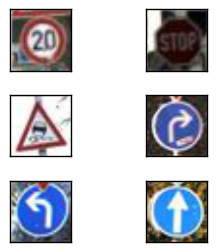

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(3, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

In [25]:
import numpy as np

X_downloaded = images
y_downloaded = list()
for _cls in classes:
    y2 = np.zeros(43, dtype=np.uint8)
    y2[_cls] = 1.
    y_downloaded.append(_cls)
    #y_downloaded.append(y)

y_downloaded = np.array(y_downloaded)

#one_hot_labels = np.zeros((y_downloaded, y_downloaded.shape[0]))
print(y_downloaded)

[ 0 14 23 33 34 35]


In [26]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './model.chkpt')
    print("Model restored.")
    print("y_downloaded",y_downloaded)
    #print("y_validation",y_validation[1 : 5])
    #test_accuracy = evaluate(x_validation, y_validation)
    test_accuracy, val_loss, predictions = evaluate(X_downloaded, y_downloaded)
    #test_accuracy, val_loss, predictions = evaluate(x_validation, y_validation)
    print("Test Accuracy = {:.3f}".format(test_accuracy*100))
    print(val_loss)
    
    #predictions = np.array([item for sublist in predictions for item in sublist])


Model restored.
y_downloaded [ 0 14 23 33 34 35]
2.0000000596 15.6362409592 6
Test Accuracy = 33.333
2.60604015986


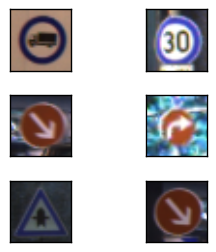

In [27]:
# Lets see Test Images
fig, axes = plt.subplots(3, 2, figsize=(3, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

**Answer:**

There are issue with
1) Brightness
2) Size of the sign in the image
3) forcusness
4) Orientation


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

I used set of German traffic signs found in the internet and scalled to 32x32.
However the accuracy was 16%. But sometime it went up to 66%.

The Test image set has a accuracy of 84%. Therefore my downloaded sign recognition is very poor.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [86]:
y_pred = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './model.chkpt')
    print("Model restored.")
    values, indices = sess.run(tf.nn.top_k(y_pred, k=4), feed_dict={x: x_validation[1010:1055],
                y: y_validation[1010:1055]})
    print(values[0], indices[0])
    

Model restored.
[  9.89956379e-01   7.03114457e-03   3.00216721e-03   6.83831740e-06] [4 2 1 5]


In [47]:
with tf.Session() as sess:
    saver.restore(sess, './model.chkpt')
    print("Model restored.")
    values = sess.run(y_pred, feed_dict={x: X_test[1000:1005],
                y: y_test[1000:1005]})
    print(values[0])

Model restored.
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.33733719e-38   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   5.18178298e-30   2.05465094e-34   0.00000000e+00
   0.00000000e+00   3.48615763e-34   1.67764022e-21   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   1.21328696e-29
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.78106285e-33   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.86413898e-38   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.16049617e-34   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.17827885e-34]


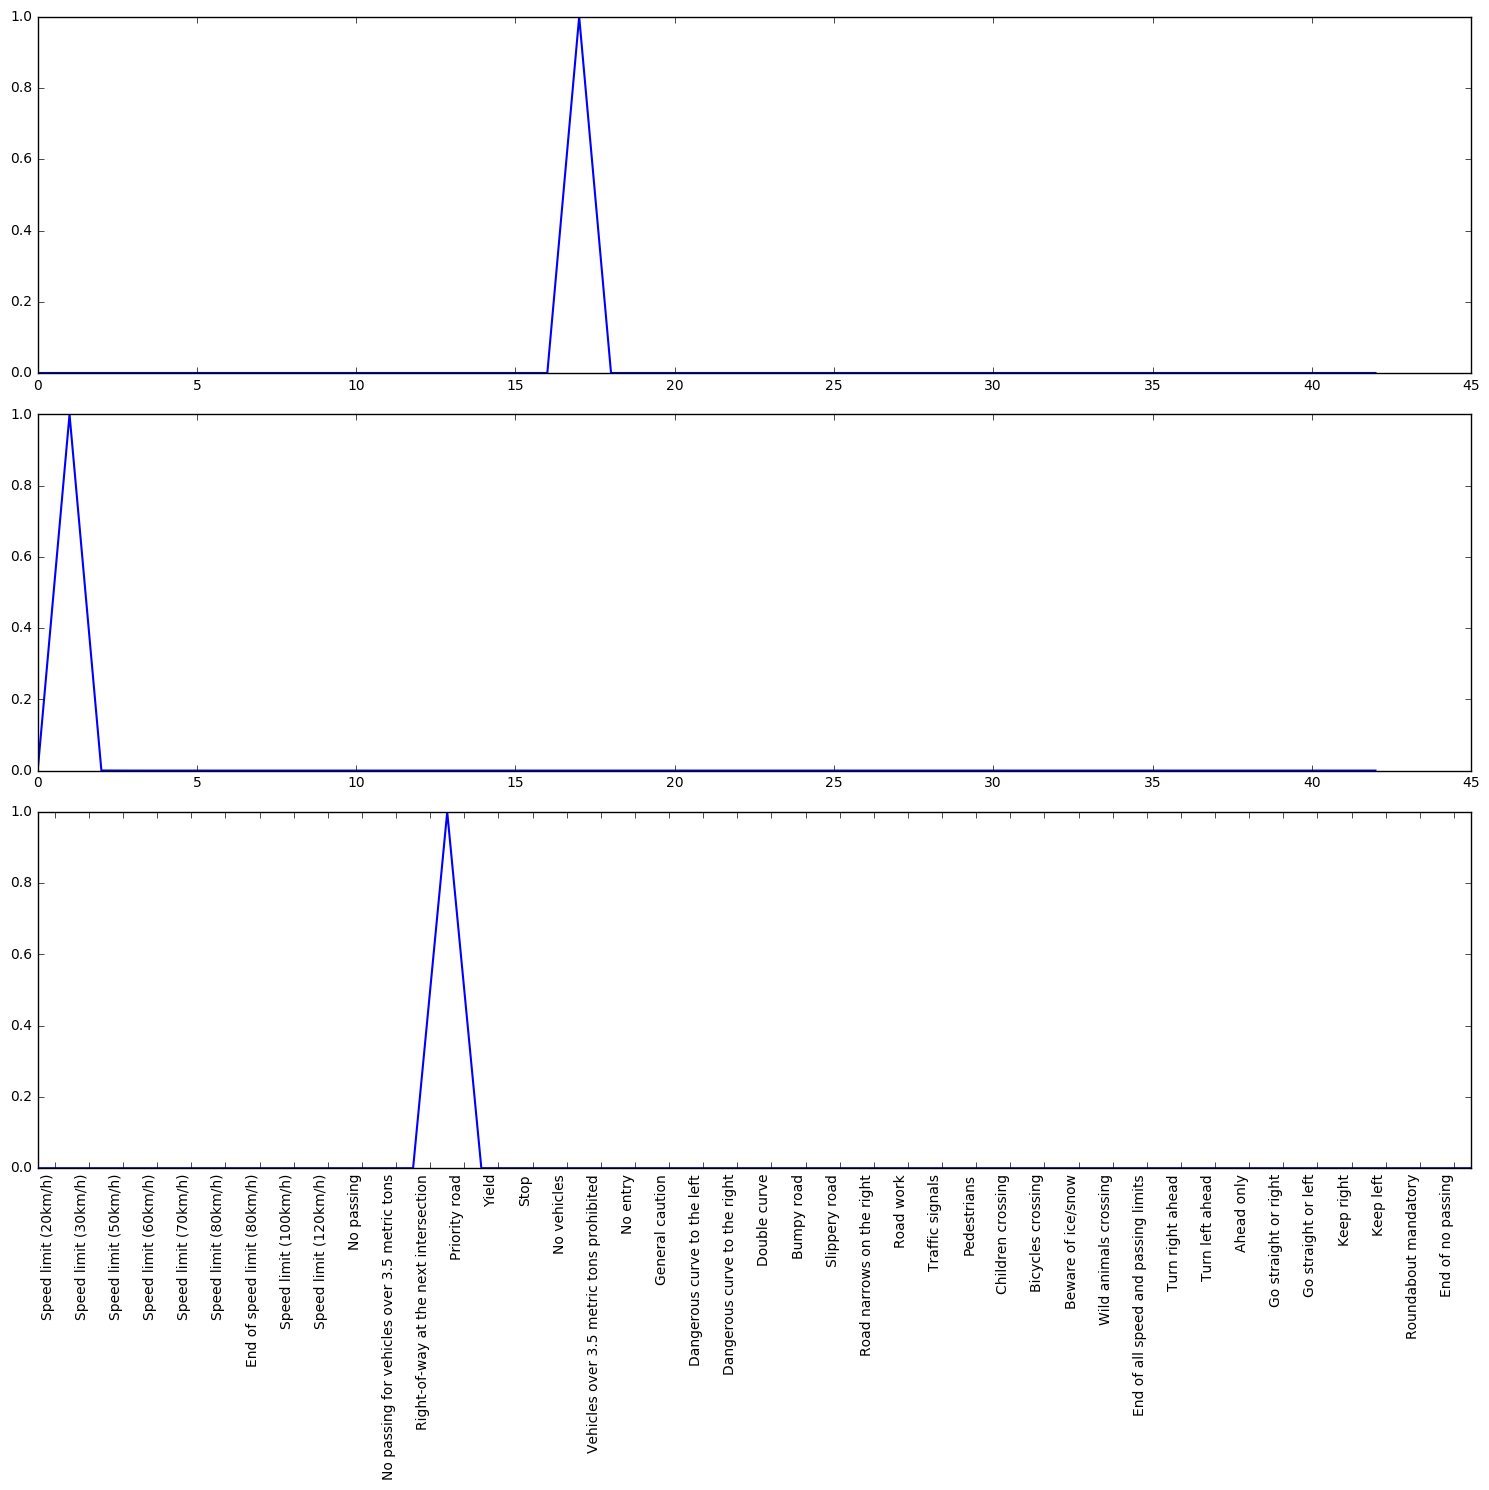

In [85]:
t = np.arange(0, len(values[0]))

fig, ax = plt.subplots(3, 1, figsize=(15, 15),sharex=False)
plt.xticks(np.arange(0.5,43.5,1.0), sgn_names ,ha='right',rotation = 90)
fig.subplots_adjust(hspace=1, wspace=1)

for i, ax in enumerate(ax.flat):

    ax.plot(t, values[i], linewidth=1.5, color='blue', alpha=1.0, label='name')
    


# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.show()